In [5]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import re

In [6]:
data = pd.read_csv('snapdeal_tweets.csv')

In [8]:
data.head(20)

,Unnamed: 0,snapdeal_tweets
0,0,Heartbroken to share that our colleague of 9 y...
1,1,We have waived shipping charges on all product...
2,2,@HarjotPal4 Getting this checked with the conc...
3,3,@BasavarajKandri Hi! Please elaborate on what ...
4,4,@Snapdeal_Help I am basavaraj kandri. Please ...
5,5,@Snapdeal_Help Work on this report as soon as ...
6,6,@HarjotPal4 We always request our customers to...
7,7,@HarjotPal4 Hi! Apologies for the experience y...
8,8,@AmazonHelp @JeffBezos @havellsindia @AmitAgar...
9,9,@Sanpdeal3 Snapdeal is a fake companyThis comp...


In [9]:
# clean the text
def clean_text(text):
    clean_words = re.sub("https\S+","",text)
    clean_words = re.sub("#[\w]*","",clean_words)
    clean_words = re.sub("@[\w]*","",clean_words)
    clean_words = re.sub("[^a-zA-Z0-9]"," ",clean_words)
    return clean_words

In [12]:
clean_text(data['snapdeal_tweets'][50])

' Hi  We ll be getting in touch with you shortly  Please grant us some time  Thanks  Shreya'

In [13]:
clean_data = data.iloc[:,1].apply(clean_text)

In [14]:
clean_data.tail(20)

172     Hi  Request you to share your exact concern v...
173            plz resolve problem regarding my account 
174     One more fraudulent attempt today from  91867...
175     We certainly understand your disappointment  ...
176     I respect you ma am but what i do more than 5...
177     We always request our customers to never shar...
178     Hi  So sorry to disappoint you  I ve shared t...
179     Hi  Apologies for this experience  please rea...
180     very bad service seriously why snapdeal reciv...
181     We would like to inform you that we have been...
182     Its been 2 days since you have said so   no o...
183    RT     That is the proof that this is not a  b...
184     Hi  So sorry for the trouble  We will connect...
185       My order hasn t been received by me but is ...
186     Hi  We always request our customers to never ...
187     Would never ever again order from SNAPDEAL my...
188     It was actually planned to be delivered to  b...
189    RT   Complete the Snapde

In [22]:
clean_data = pd.DataFrame(clean_data)

In [16]:
clean_data[19]

' Hi  Apologies for this experience  please reach out to us via  Private Message  to share your details  '

In [17]:
# Get the subjectivity and polarity
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity

def get_pol(text):
    return TextBlob(text).sentiment.polarity

In [23]:
get_pol(clean_data.iloc[65,0])

0.1

In [24]:
clean_data['Subjectivity'] = clean_data.iloc[:,0].apply(get_sub)
clean_data['Polarity'] = clean_data.iloc[:,0].apply(get_pol)


In [25]:
clean_data.head(20)

,snapdeal_tweets,Subjectivity,Polarity
0,Heartbroken to share that our colleague of 9 y...,0.225000,-0.041667
1,We have waived shipping charges on all product...,0.000000,0.000000
2,Getting this checked with the concerned team ...,0.200000,0.200000
3,Hi Please elaborate on what went wrong via ...,0.758333,0.000000
4,I am basavaraj kandri Please help me,0.000000,0.000000
5,Work on this report as soon as possible,1.000000,0.000000
6,We always request our customers to never shar...,0.183333,0.000000
7,Hi Apologies for the experience you have bee...,0.000000,0.000000
8,Manufacturer already in loop get ready ...,0.500000,0.200000
9,Snapdeal is a fake companyThis company does n...,1.000000,-0.500000


In [27]:
clean_data[clean_data['Polarity']>0.5]  #positive comments

,snapdeal_tweets,Subjectivity,Polarity
26,t s good that your team cancelled the order y...,0.600000,0.70
99,Best fraud app in india Please dont buy a...,0.300000,1.00
108,O bhai now if you CEO and owner If want...,1.000000,0.60
115,Snapdeal my account deduct 640 rupees not ...,0.900000,0.60
154,Hi I know it is taking some time but we are ...,0.944444,0.75
174,One more fraudulent attempt today from 91867...,0.500000,0.60


In [28]:
clean_data[clean_data['Polarity']<-0.5]   #negative comments

,snapdeal_tweets,Subjectivity,Polarity
21,very bad quality oximeter in your website and...,0.866667,-0.910
31,Really sorry for the unpleasant experience T...,0.975000,-0.575
57,one of the worst service ever by snapdeal Th...,1.000000,-1.000
76,Worst product selling done by SD My contact93...,1.000000,-1.000
117,Hi Really sorry for the unpleasant experienc...,0.975000,-0.575
164,THE WORST PLATFORM I HAVE EVER WORKED WITH IS...,1.000000,-1.000


In [29]:
clean_data[clean_data['Subjectivity']>0.5]

,snapdeal_tweets,Subjectivity,Polarity
3,Hi Please elaborate on what went wrong via ...,0.758333,0.000000
5,Work on this report as soon as possible,1.000000,0.000000
9,Snapdeal is a fake companyThis company does n...,1.000000,-0.500000
10,Hi Ashi There was nothing wrong with the ser...,0.900000,-0.500000
11,Hi Please elaborate on what went wrong via ...,0.758333,0.000000
12,So sorry to disappoint you I ll get this che...,0.600000,-0.150000
21,very bad quality oximeter in your website and...,0.866667,-0.910000
25,We always strive hard to make sure that our c...,0.732639,0.252083
26,t s good that your team cancelled the order y...,0.600000,0.700000
31,Really sorry for the unpleasant experience T...,0.975000,-0.575000


In [30]:
def sentiment(polarity):
    if polarity>0.3:
        return 'Positive'
    elif polarity<-0.3:
        return 'Negative'
    else:
        return 'Neutral'

In [31]:
clean_data['Sentiment'] = clean_data['Polarity'].apply(sentiment)

In [34]:
clean_data.head(20)

,snapdeal_tweets,Subjectivity,Polarity,Sentiment
0,Heartbroken to share that our colleague of 9 y...,0.225000,-0.041667,Neutral
1,We have waived shipping charges on all product...,0.000000,0.000000,Neutral
2,Getting this checked with the concerned team ...,0.200000,0.200000,Neutral
3,Hi Please elaborate on what went wrong via ...,0.758333,0.000000,Neutral
4,I am basavaraj kandri Please help me,0.000000,0.000000,Neutral
5,Work on this report as soon as possible,1.000000,0.000000,Neutral
6,We always request our customers to never shar...,0.183333,0.000000,Neutral
7,Hi Apologies for the experience you have bee...,0.000000,0.000000,Neutral
8,Manufacturer already in loop get ready ...,0.500000,0.200000,Neutral
9,Snapdeal is a fake companyThis company does n...,1.000000,-0.500000,Negative


In [35]:
clean_data[clean_data['Sentiment']=='Negative']['snapdeal_tweets']

9       Snapdeal is a fake companyThis company does n...
10      Hi Ashi  There was nothing wrong with the ser...
21      very bad quality oximeter in your website and...
31      Really sorry for the unpleasant experience  T...
57      one of the worst service ever by snapdeal  Th...
75      Hi  Very sorry for the inconvenience caused  ...
76      Worst product selling done by SD My contact93...
79      Isiliye desh ki g padi hai  your priorities a...
117     Hi  Really sorry for the unpleasant experienc...
127       Fraud app please do not buy anything from t...
139    Fake IDs are usually punishable under Section ...
150    I have listed  Delrin Thin Triangle Guitar Pic...
164     THE WORST PLATFORM I HAVE EVER WORKED WITH IS...
180     very bad service seriously why snapdeal reciv...
181     We would like to inform you that we have been...
Name: snapdeal_tweets, dtype: object

In [56]:
clean_data['Sentiment'].value_counts()

Neutral     157
Positive     20
Negative     15
Name: Sentiment, dtype: int64

In [57]:
text_list = list(clean_data[clean_data['Sentiment']=='Negative']['snapdeal_tweets'])
text = ' '.join(text_list)

In [58]:
text

' Snapdeal is a fake companyThis company does not retrun ouprvou nhi krdi anyone but hePlease do not rely    Hi Ashi  There was nothing wrong with the service you are offering  I am probably NOT your target cu    very bad quality oximeter in your website and app  You are also not replacing or returning this product e    Really sorry for the unpleasant experience  This shouldn t have happened  I have asked my team to conne    one of the worst service ever by snapdeal  The order that was placed on 16th Apr and was supposed to be d    Hi  Very sorry for the inconvenience caused  we ve noted down the order ID  amp  I ll get this checked  amp  con    Worst product selling done by SD My contact9372777672 Duplicate material is being sold  Don t purchase    Isiliye desh ki g padi hai  your priorities are wrong  BTW That chut    Goa wala was the on    Hi  Really sorry for the unpleasant experience  As conveyed to you over the call  please wait till      Fraud app please do not buy anything from

In [59]:
lis = ['s','t','rt','hi','hello','snapdeal','thanks','please']
text_n=''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

In [60]:
text_n

' is a fake companythis company does not retrun ouprvou nhi krdi anyone but heplease do not rely ashi there was nothing wrong with the service you are offering i am probably not your target cu very bad quality oximeter in your website and app you are also not replacing or returning this product e really sorry for the unpleasant experience this shouldn have happened i have asked my team to conne one of the worst service ever by the order that was placed on 16th apr and was supposed to be d very sorry for the inconvenience caused we ve noted down the order id amp i ll get this checked amp con worst product selling done by sd my contact9372777672 duplicate material is being sold don purchase isiliye desh ki g padi hai your priorities are wrong btw that chut goa wala was the on really sorry for the unpleasant experience as conveyed to you over the call wait till fraud app do not buy anything from this app sad too see fake ids are usually punishable under section 420 of the indian penal cod

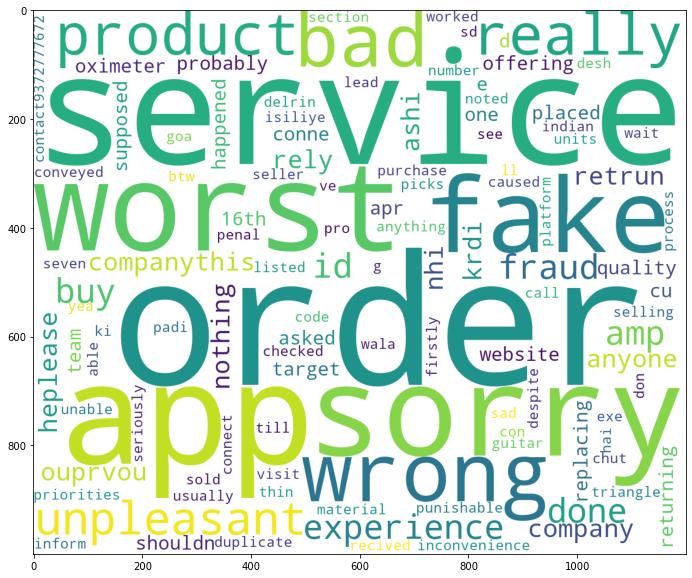

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
wc = WordCloud(width=1200,height=1000,background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()

In [62]:
text_list = list(clean_data[clean_data['Sentiment']=='Positive']['snapdeal_tweets'])
text = ' '.join(text_list)

In [63]:
lis = ['s','t','rt','hi','hello','snapdeal','thanks','please']
text_n=''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

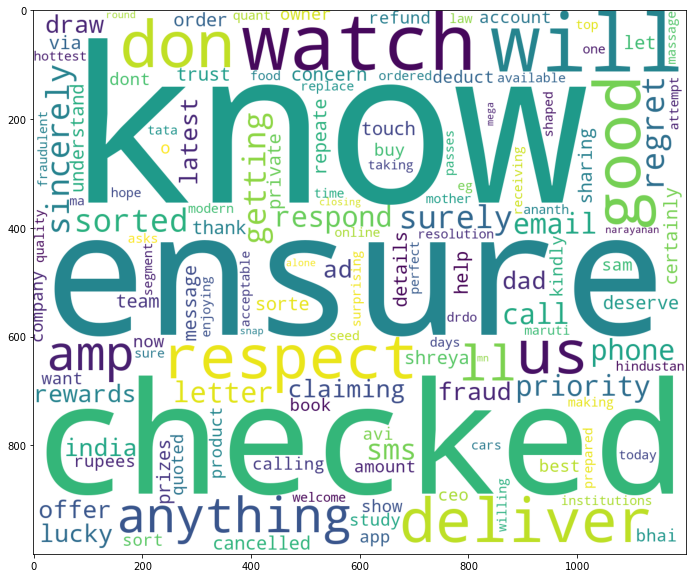

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
wc = WordCloud(width=1200,height=1000,background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()